In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("newdf.csv")

Text(0.5, 1.0, 'Top 15 cities with high number of restaurants')

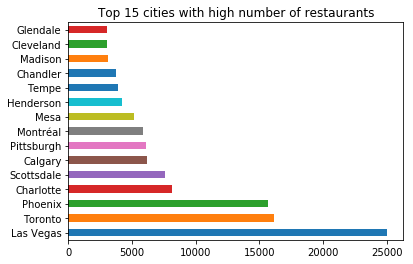

In [21]:
topcity=df['cities'].value_counts()
topcity[:15].plot(kind="barh")
plt.title("Top 15 cities with high number of restaurants")

In [22]:
topcity.to_csv("topcity.csv")

Text(0.5, 1.0, 'Top 15 states with high number of restaurants')

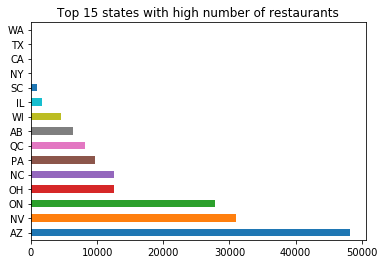

In [23]:
topstate=df['states'].value_counts()
topstate[:15].plot(kind="barh")
plt.title("Top 15 states with high number of restaurants")

In [24]:
df2 = pd.read_csv("all_business.csv")

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
XGM        4
FL         4
CT         3
WA         3
AL         3
VA         2
VT         2
GA         2
NE         2
AK         2
XWY        2
NJ         1
BC         1
CON        1
AR         1
XGL        1
TN         1
NM         1
UT         1
DUR        1
BAS        1
DOW        1
Name: states, dtype: int64


Text(0.5, 1.0, 'Top 15 states with high number of restaurants')

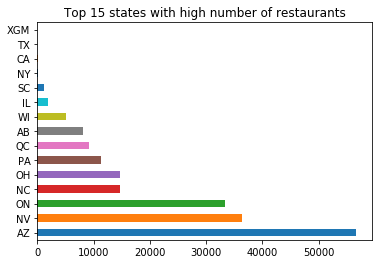

In [45]:
topstate=df2['states'].value_counts()
print(topstate)
topstate[:15].plot(kind="barh")
plt.title("Top 15 states with high number of restaurants")

In [13]:
df['states'].value_counts().to_csv("states.csv")

In [3]:
categoryDict = pd.read_csv('categoryDict.csv')

In [4]:
print(categoryDict[:15])

                     Category  Number
0                 Restaurants   59371
1                    Shopping   31878
2                        Food   29989
3               Home Services   19729
4               Beauty & Spas   19370
5            Health & Medical   17171
6              Local Services   13932
7                  Automotive   13203
8                   Nightlife   13095
9                        Bars   11341
10  Event Planning & Services   10371
11                Active Life    9521
12                    Fashion    7798
13                 Sandwiches    7332
14               Coffee & Tea    7321


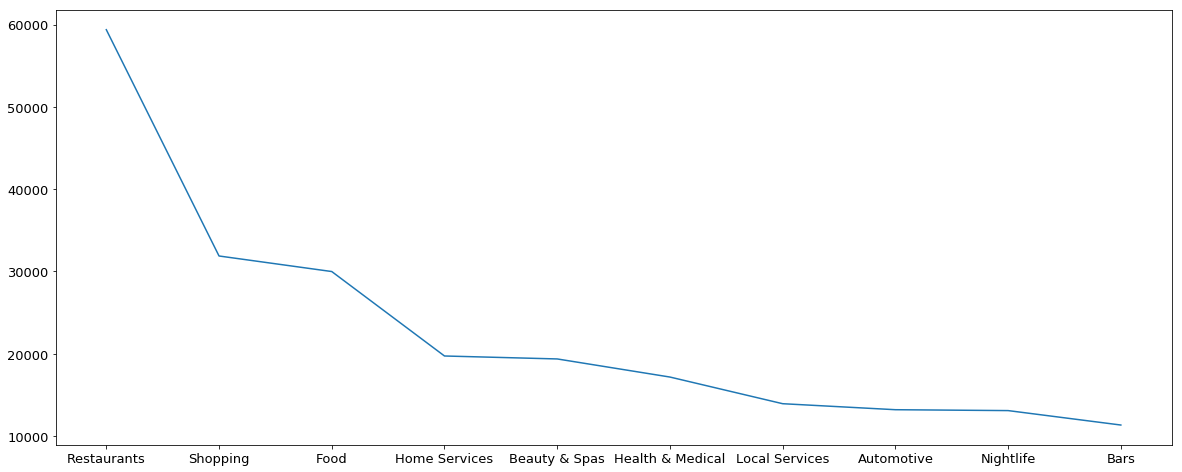

In [5]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 13})
plt.plot(categoryDict['Category'][:10], categoryDict['Number'][:10])

<BarContainer object of 4 artists>

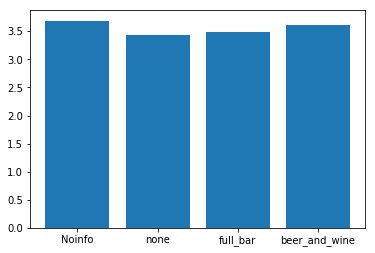

In [23]:
Type=[]
Meanval=[]
for i in df['alcohol'].value_counts().index:
    Type.append(i)
    Meanval.append(df[df['alcohol']==i]['star'].mean())
plt.bar(Type,Meanval) 

<BarContainer object of 4 artists>

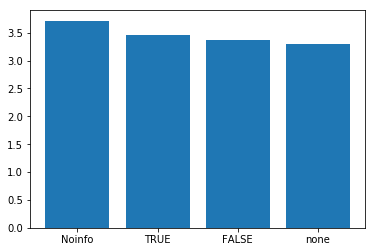

In [24]:
Type=[]
Meanval=[]
for i in df['goodforgroups'].value_counts().index:
    Type.append(i)
    Meanval.append(df[df['goodforgroups']==i]['star'].mean())
plt.bar(Type,Meanval) 

<BarContainer object of 6 artists>

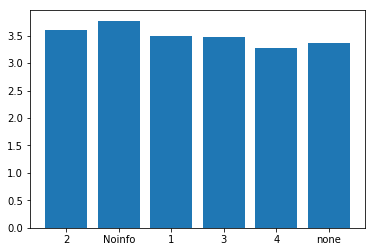

In [25]:
Type=[]
Meanval=[]
for i in df['pricerange'].value_counts().index:
    Type.append(i)
    Meanval.append(df[df['pricerange']==i]['star'].mean())
plt.bar(Type,Meanval) 

<BarContainer object of 4 artists>

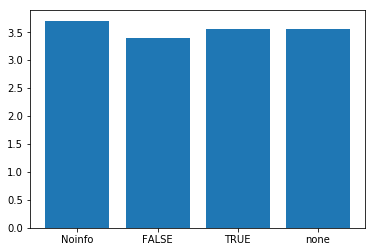

In [27]:
Type=[]
Meanval=[]
for i in df['reservations'].value_counts().index:
    Type.append(i)
    Meanval.append(df[df['reservations']==i]['star'].mean())
plt.bar(Type,Meanval) 

In [36]:
df=df.fillna(00000)

# ML


In [4]:
take=df.columns.drop('user_id')

In [5]:
y=df['star']
take=take.drop(['star','cities','states','postal_codes'])
X=df[take]

In [6]:
from sklearn.preprocessing import LabelEncoder
df1=pd.DataFrame()
for i in take[:-3]:
   
    LE = LabelEncoder()
    df1[i]= LE.fit_transform(X[i])


In [7]:
df1['avg_state']=X['avg_state']
df1['avg_postalCode']=X['avg_postalCode']
df1['avg_City']=X['avg_City']

In [29]:
X=df1
X=X.fillna(method='ffill')


In [30]:
#Finding row with NaN value
nan_rows = X[X.isnull().T.any().T]
print(len(nan_rows))

0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import AdaBoostRegressor

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
model= AdaBoostRegressor(n_estimators=200,learning_rate=0.001,loss='square',)

In [55]:
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='square',
         n_estimators=200, random_state=None)

In [56]:
ytemp=model.predict(X_test)

In [57]:
newscore=[]
for i in ytemp:
    a=round(i,2)
    dif=a-int(i)
    if(dif<0.25):
        newscore.append(int(i))
    elif(0.25<dif<0.75):
        newscore.append(int(i)+0.5)
    elif(0.75<dif):
        newscore.append(int(i)+1)

In [58]:
count=0
for i in range(len(newscore)):
    if(newscore[i]==y_test.iloc[i]):
        count+=1
print(count/len(newscore)) 

0.18226886668911588


In [64]:
a=model.feature_importances_

In [68]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [93]:
model = Sequential()

# The Input Layer :
model.add(Dense(128,input_dim=19,kernel_initializer='normal',activation='relu'))

# The Hidden Layers :
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))

# The Output Layer :
model.add(Dense(1,activation='linear'))

# Compile the network :
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])


In [109]:
model.fit(X_train,y_train, epochs=20,validation_split = 0.2)

Train on 87781 samples, validate on 21946 samples
Epoch 1/20
87781/87781 [==============================] - 27s 302us/step - loss: 0.7554 - mean_absolute_error: 0.6861 - val_loss: 0.7596 - val_mean_absolute_error: 0.6884
Epoch 2/20
87781/87781 [==============================] - 27s 304us/step - loss: 0.7548 - mean_absolute_error: 0.6863 - val_loss: 0.7582 - val_mean_absolute_error: 0.6870
Epoch 3/20
87781/87781 [==============================] - 27s 304us/step - loss: 0.7523 - mean_absolute_error: 0.6848 - val_loss: 0.7747 - val_mean_absolute_error: 0.6873
Epoch 4/20
87781/87781 [==============================] - 26s 291us/step - loss: 0.7527 - mean_absolute_error: 0.6848 - val_loss: 0.7600 - val_mean_absolute_error: 0.6828
Epoch 5/20
87781/87781 [==============================] - 25s 284us/step - loss: 0.7510 - mean_absolute_error: 0.6839 - val_loss: 0.7729 - val_mean_absolute_error: 0.6829
Epoch 6/20
87781/87781 [==============================] - 25s 283us/step - loss: 0.7500 - mean_

In [110]:
model.score(X_test,y_test)

AttributeError: 'Sequential' object has no attribute 'score'

In [99]:
ytemp=model.predict(X_test)

In [102]:
newscore=[]
for j in ytemp:
    for i in j:
        a=round(i,2)
        dif=a-int(i)
        if(dif<0.25):
            newscore.append(int(i))
        elif(0.25<dif<0.75):
            newscore.append(int(i)+0.5)
        elif(0.75<dif):
            newscore.append(int(i)+1)

In [103]:
count=0
for i in range(len(newscore)):
    if(newscore[i]==y_test.iloc[i]):
        count+=1
print(count/len(newscore)) 

0.17665142228210334


In [108]:
ytemp

array([[1.9485756],
       [3.8258271],
       [3.6287956],
       ...,
       [3.486238 ],
       [3.6590352],
       [3.5188217]], dtype=float32)

In [107]:
y_test

103366    2.5
111729    4.0
69148     3.5
136369    4.0
116037    3.5
87462     3.5
73188     4.0
110199    4.0
149654    2.0
82235     5.0
73358     5.0
44165     2.5
162773    3.5
154505    4.5
107830    4.0
145469    4.5
159304    4.0
56445     4.0
75189     3.5
117119    3.5
66908     4.5
31196     3.5
66672     3.5
88808     3.5
144173    4.0
634       1.0
26754     4.5
95223     2.0
85531     4.5
52583     3.0
         ... 
126458    3.5
11931     3.5
147994    4.0
162286    4.5
27203     3.0
92430     4.5
143797    3.0
98866     2.5
110119    5.0
84132     4.0
52599     3.0
61271     5.0
76533     4.0
115578    4.5
82929     5.0
34086     4.0
74770     3.5
74160     5.0
85592     3.0
42572     3.5
130140    1.5
30749     3.0
123876    5.0
71661     3.0
72161     3.5
153185    4.0
147104    4.5
8457      4.0
64815     2.0
20021     3.5
Name: star, Length: 54046, dtype: float64